# loading the dataset

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


# plotting dendrograms with possible combinations of methods and metrics

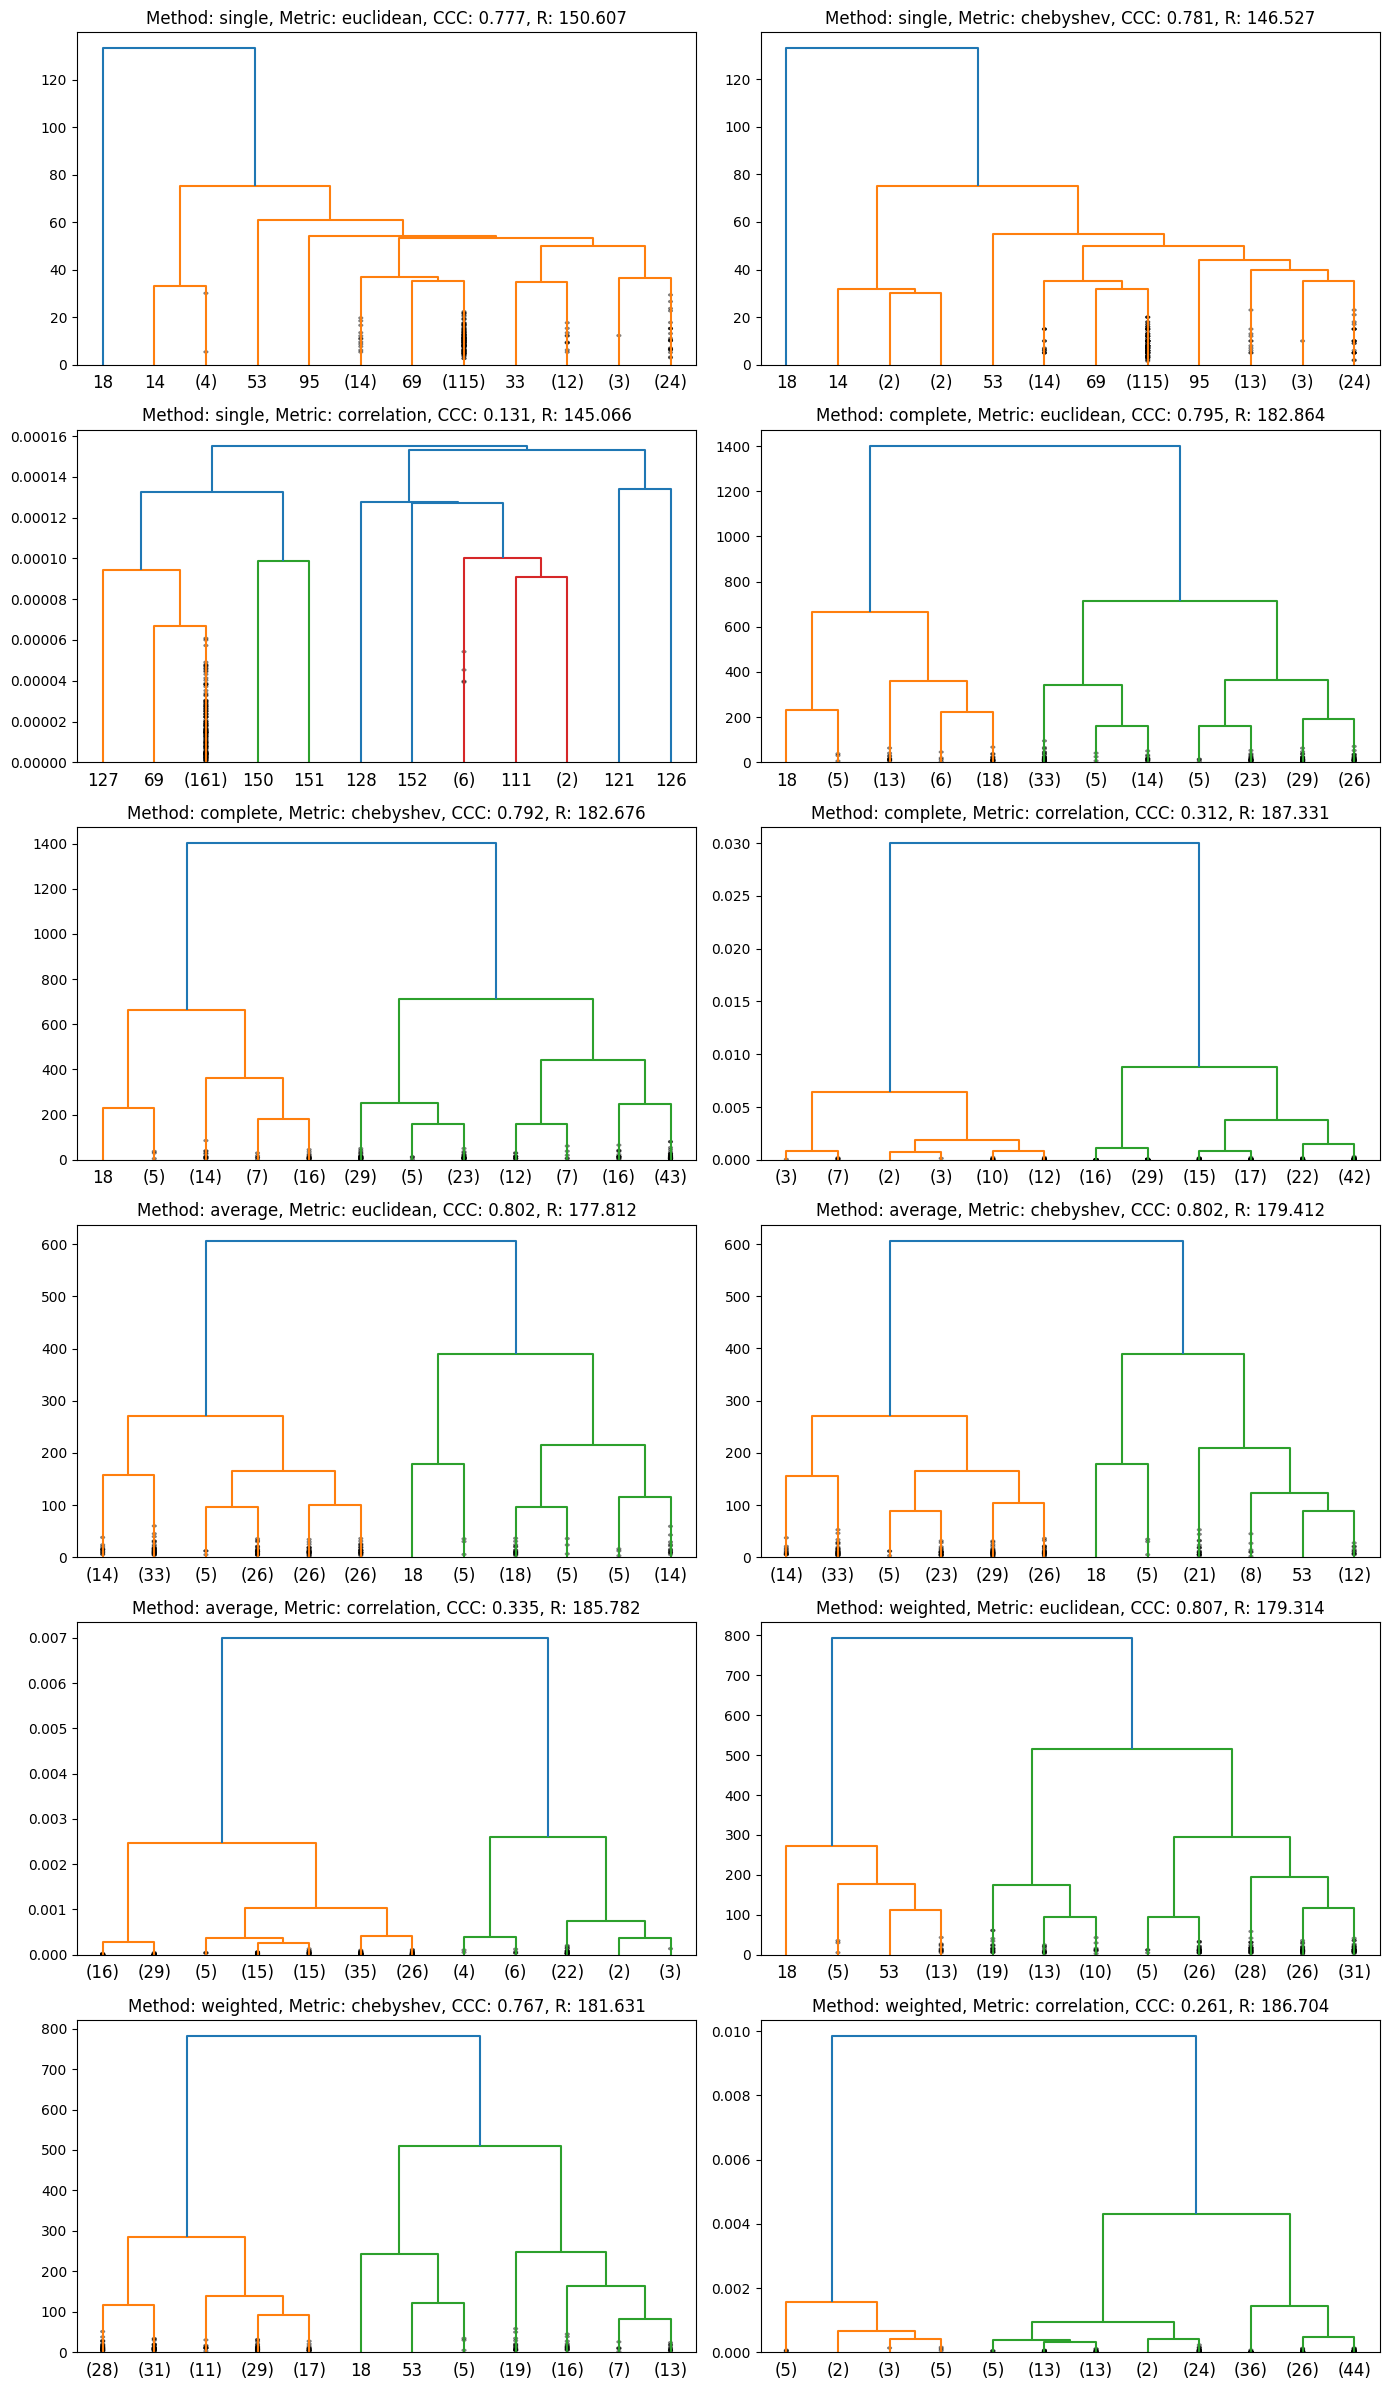

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, inconsistent, fcluster
from scipy.spatial.distance import pdist
import itertools
import matplotlib.pyplot as plt


methods = ['single','complete','average','weighted']
metrics = ['euclidean','chebyshev','correlation']
combination = list(itertools.product(methods, metrics))

CCC,R = [],[]


# plotting the dendrogram for every pair
fig, axes = plt.subplots(len(combination)//2, 2, figsize=(14, 2 * len(combination)))
for i, (method, metric) in enumerate(combination): 
    row, col = i // 2, i % 2  
    ax = axes[row, col] 
    Z = linkage(df.values, method=method, metric=metric)
    CCC.append(cophenet(Z, pdist(df.values))[0])
    R.append(inconsistent(Z, 5))
    dendrogram(Z, truncate_mode='lastp', p=12, show_contracted=True, labels=df.index, ax=ax)
    ax.set_title('Method: {}, Metric: {}, CCC: {:.3f}, R: {:.3f}'.format(method, metric, CCC[-1], np.sum(R[-1][:, 3])))
plt.tight_layout()
plt.show()

# choosing the best dendro that has highest value of ccc

In [3]:
combination=np.array(combination)
CCC = np.array(CCC)
arg = np.argsort(CCC,kind ='quicksort')[::-1]
top_3 = combination[arg[:3]]
print('The 3 top Pairs are :')
for i, element in enumerate(top_3):
    print(f'Method : {element[0]}, Metric : {element[1]} with the CCC {CCC[arg[i]]}.')

The 3 top Pairs are :
Method : weighted, Metric : euclidean with the CCC 0.8066329069977862.
Method : average, Metric : euclidean with the CCC 0.8022638349313509.
Method : average, Metric : chebyshev with the CCC 0.802080714124788.


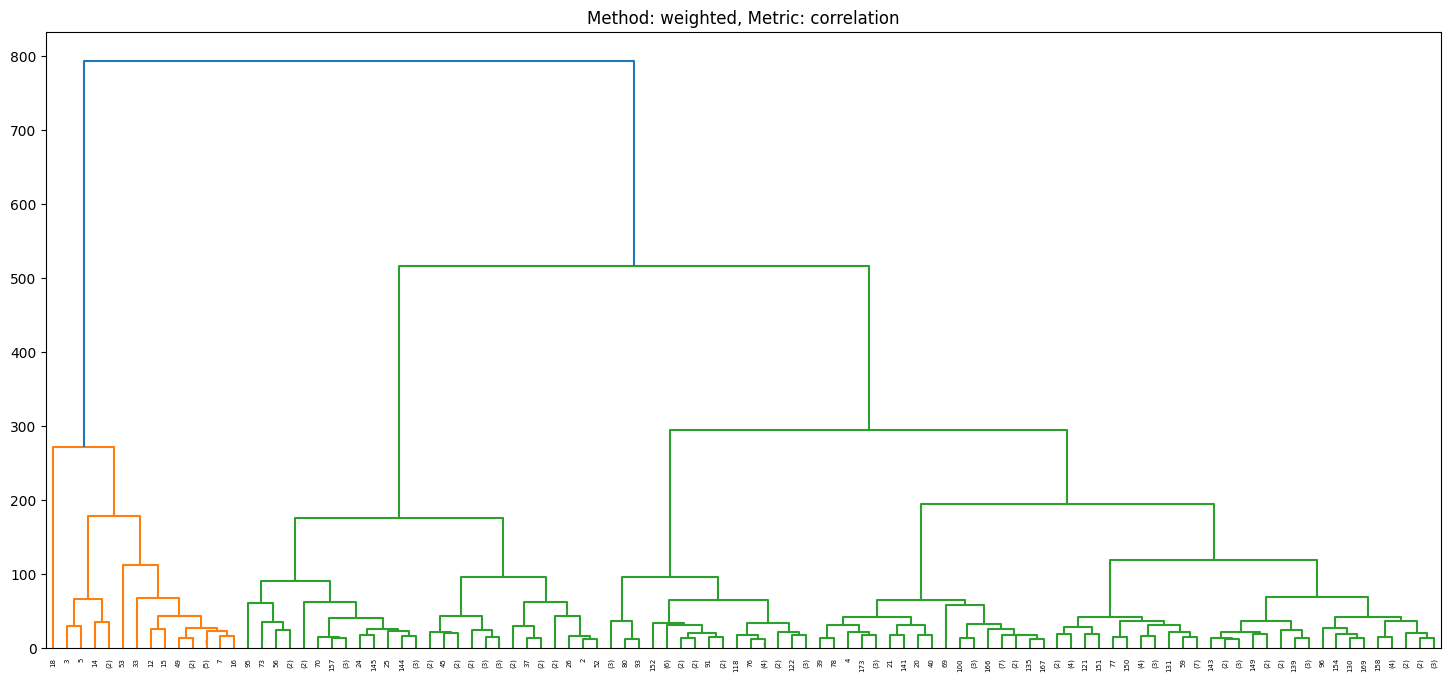

In [4]:
Z = linkage(df.values, method='weighted', metric='euclidean')
plt.figure(figsize=(18,8))
dendrogram(Z, truncate_mode='lastp', p=100, show_contracted=True, labels=df.index)
plt.title('Method: {}, Metric: {}'.format(method, metric,))
plt.show()

# selecting the best k-cluster value according to the highest ccc value

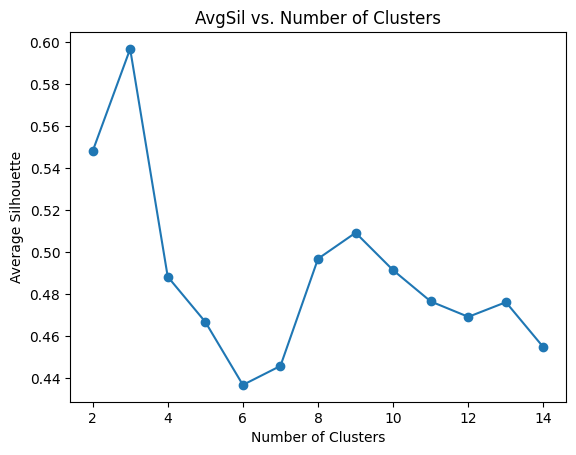

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = []
k_values = range(2, 15)  

for k in k_values:
    clusters = fcluster(linkage(df.values, method='weighted', metric='euclidean'), k, criterion='maxclust')
    silhouette_avg.append(silhouette_score(df, clusters))
    

plt.plot(k_values, silhouette_avg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette')
plt.title('AvgSil vs. Number of Clusters')
plt.show()

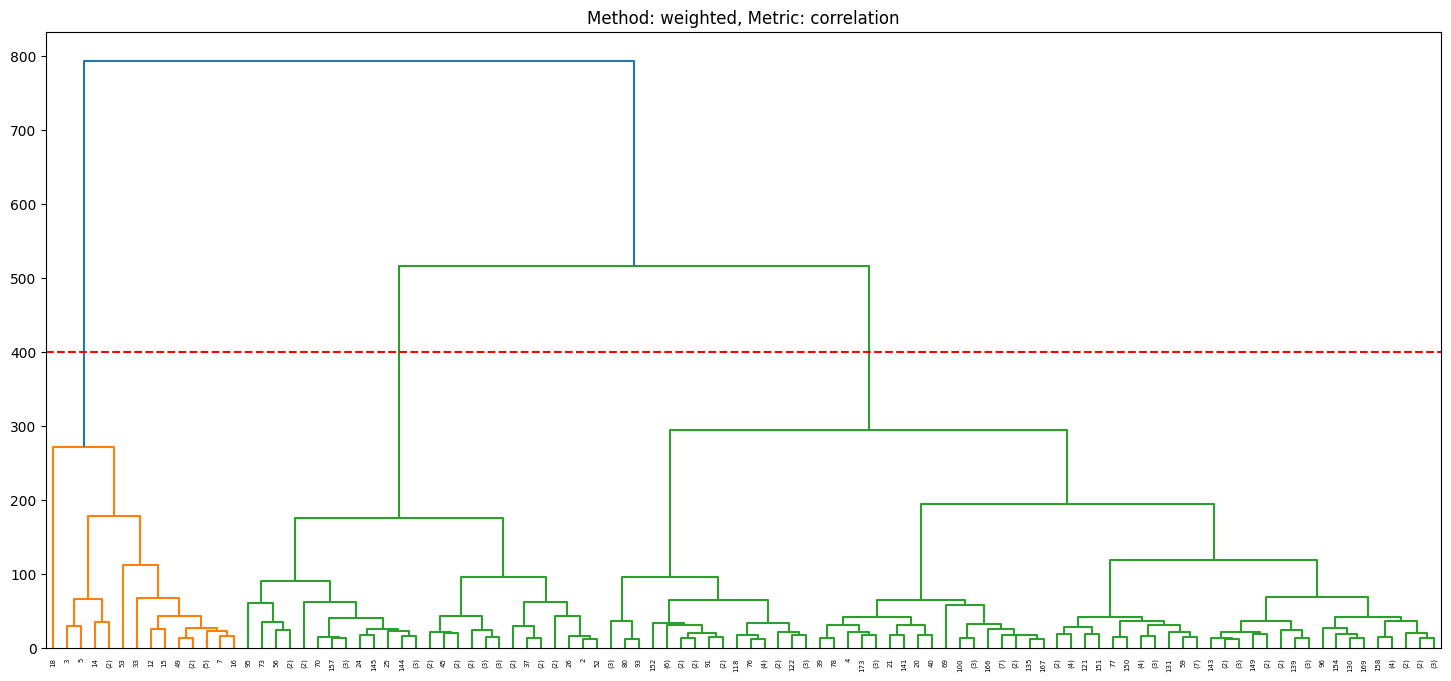

The optimal k value is: 3


In [6]:
Z = linkage(df.values, method='weighted', metric='euclidean')
plt.figure(figsize=(18,8))
dendrogram(Z, truncate_mode='lastp', p=100, show_contracted=True, labels=df.index)
plt.title('Method: {}, Metric: {}'.format(method, metric,))
plt.axhline(y=400, color='r', linestyle='--', label='k')
plt.show()
print('The optimal k value is: 3')